# CNN for Fashion-MNIST dataset

### Problem Description

We're provided with a dataset of small grayscale images depicting various clothing objects. They are subdivided into ten classes, and our goal is to build a CNN that predicts those classes as precisely as possible. We will build several (simple) CNNs and then compare their performace and efficiency.  

### Loading and preparing the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

from random import randrange
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the train and the test set
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)


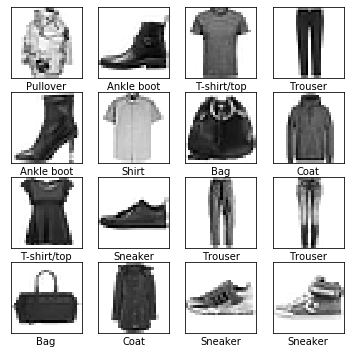

In [3]:
#labeling the classes and displaying some images from the dataset
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    k = randrange(6000)
    plt.imshow(X_train[k], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[k]])
plt.show()


The train and the test sets are given as a three-dimensional vectors. However, in order to feed our CNN with the images, we need them to be 4D vectors. That's why wee need to add an additional dimension. This additional dimension tells the number of channels. Since our images are in grayscale, we have only one channel.

Also, we scale the values of every entry.

In [4]:
#Adding the fourth axis
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)

In [5]:
#Scaling the values to [0,1] range
X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train = X_train/255
X_test = X_test/255

### Building the CNN

Here we build a bit deeper CNN. It consists of several 3x3 convolutional layers, two big fully connected layers (and one for the classification output), it uses max-pooling and the dropout. 

We use nadam as an optimizer, and sparse categorical crossentropy for the loss function.



(This is an architecture I was working with in a deep-learning course; I used it for cifar 10 classification, so I wanted to also see how it performs on fashion-mnist. Since I have an integrated Intel graphic card, I had to the train the network using CPU; running it on GPU would allow me to train it significantly faster, for more epochs, which could lead to better accuracy)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.optimizers import nadam
from keras.losses import SparseCategoricalCrossentropy

In [7]:
cnn = Sequential()

cnn.add(Conv2D(input_shape = (28, 28, 1), filters = 64, 
              kernel_size = (3,3), activation = 'relu', padding='same'))
cnn.add(Conv2D(filters = 64, 
              kernel_size = (3,3), activation = 'relu', padding='same'))
cnn.add(MaxPool2D((2,2)))
cnn.add(Dropout(0.4))


cnn.add(Conv2D(filters = 128, 
              kernel_size = (3,3), activation = 'relu', padding='same'))
cnn.add(Conv2D(filters = 128, 
              kernel_size = (3,3), activation = 'relu',padding='same'))
cnn.add(MaxPool2D((2,2)))
cnn.add(Dropout(0.4))


cnn.add(Flatten())


cnn.add(Dense(units = 1024, activation = 'relu'))
cnn.add(Dense(units = 1024, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'softmax'))

In [8]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)        

In [9]:
cnn.compile(loss = SparseCategoricalCrossentropy(), 
           optimizer = nadam(lr = 0.001),
           metrics = ['accuracy'])

In [10]:
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = 6, 
        shuffle = True, validation_data= (X_test, y_test), 
        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 572s 10ms/step - loss: 0.4126 - accuracy: 0.8459 - val_loss: 0.2949 - val_accuracy: 0.8872
Epoch 2/6
60000/60000 [==============================] - 561s 9ms/step - loss: 0.2574 - accuracy: 0.9051 - val_loss: 0.2677 - val_accuracy: 0.9055
Epoch 3/6
60000/60000 [==============================] - 564s 9ms/step - loss: 0.2181 - accuracy: 0.9193 - val_loss: 0.2276 - val_accuracy: 0.9191
Epoch 4/6
60000/60000 [==============================] - 562s 9ms/step - loss: 0.1938 - accuracy: 0.9283 - val_loss: 0.2048 - val_accuracy: 0.9239
Epoch 5/6
60000/60000 [==============================] - 565s 9ms/step - loss: 0.1735 - accuracy: 0.9349 - val_loss: 0.2116 - val_accuracy: 0.9264
Epoch 6/6
60000/60000 [==============================] - 568s 9ms/step - loss: 0.1614 - accuracy: 0.9394 - val_loss: 0.2094 - val_accuracy: 0.9302


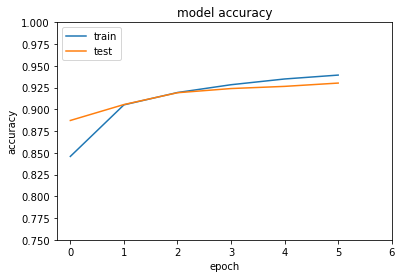

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(0,7,1))
plt.ylim(0.75,1), plt.yticks(np.arange(0.75,1.025,0.025))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy Analysis

At the end of the training, our model classified the images with the 93.9% accuracy on the training set, and 93% on the test set. There is no overfit, and the performance on the test set is good. Training this network on GPU would shurely provide even better result in faster time.

Let's now draw the confusion matrix for our model, and see how it performs on several randomly chosen images.

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = cnn.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)

In [14]:
import itertools

# Function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    # Plot the confusion matrix as an image
    plt.figure(figsize = (14, 14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 22)
    
    # Tick marks show the labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Add the numbers to the plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")

    # Formatting
    plt.tight_layout()
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylabel('True label', size = 18)
    plt.xlabel('\n Predicted label', size = 18)

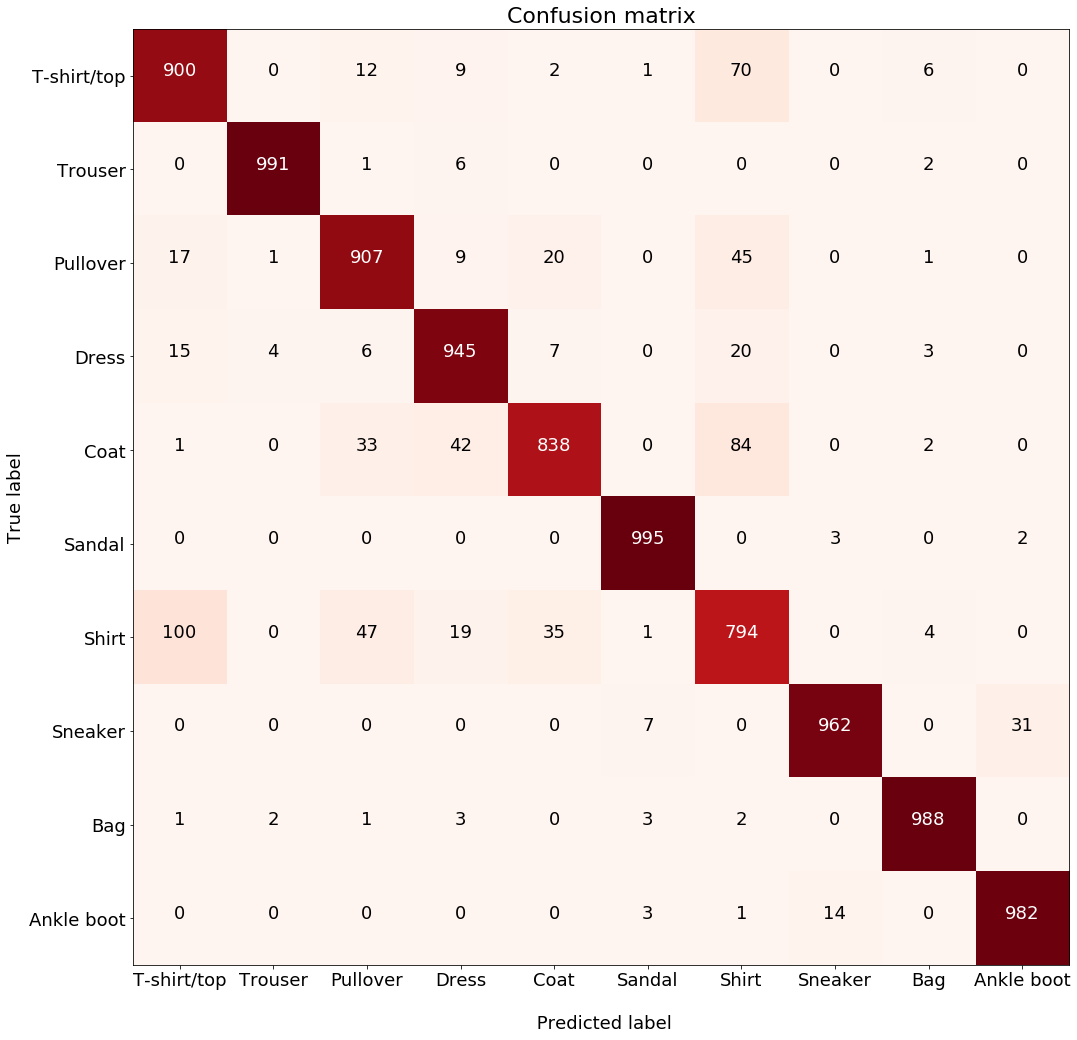

In [15]:
plot_confusion_matrix(cm, class_labels)

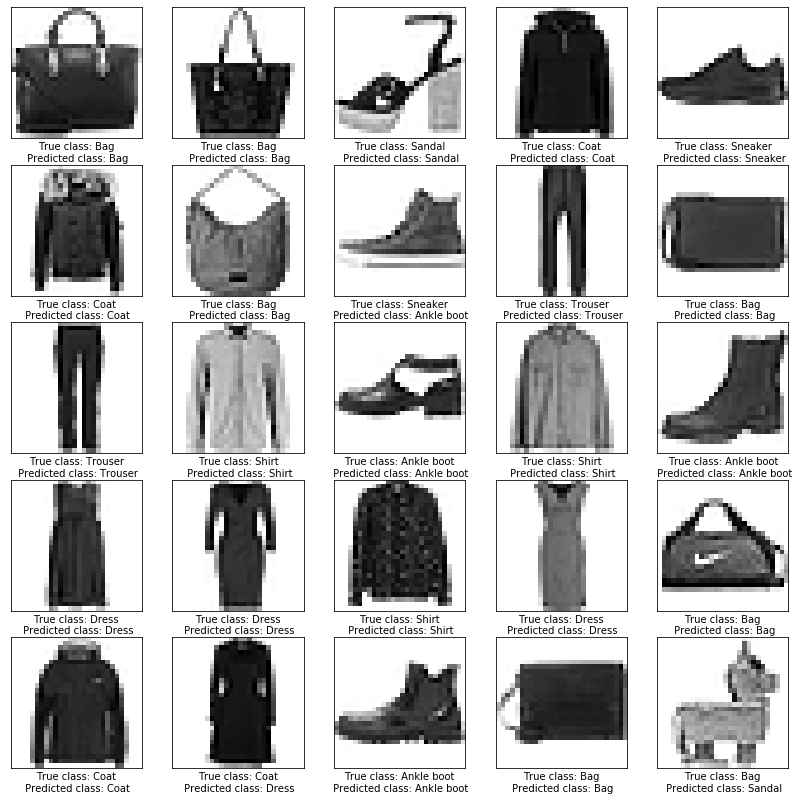

In [17]:
X_test_sq = np.squeeze(X_test, axis = 3)
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    k = randrange(6000)
    plt.imshow(X_test_sq[k], cmap=plt.cm.binary)
    plt.xlabel('True class: ' + class_labels[y_test[k]] +
        '\n Predicted class: ' + class_labels[y_pred[k]])
plt.show()

### Conclusions

We see that our model has a bit of a trouble distinguishing among T-shirt/shirts/coat classes and sneaker/boot classes. It doesn't overfit, has a good test score, but it takes time to train (on CPU).